# Felipe Veloso Desafío - Dimensionalidad y Agrupación(II)

In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
from scipy import stats
import seaborn as sns

import warnings
warnings.filterwarnings(action="ignore")

plt.style.use('seaborn-whitegrid')
plt.rcParams['figure.figsize'] = (10,6)

# Desafío 1: Preparación del ambiente de trabajo

In [2]:
from sklearn.cluster import KMeans

In [3]:
from skimage import io

# Desafío 2: Importación de imagenes

In [4]:
io.imread('album_covers/alt-j-this-is-all-yours.jpg')

array([[[239, 238, 244],
        [239, 238, 244],
        [239, 238, 244],
        ...,
        [244, 243, 249],
        [244, 243, 249],
        [244, 243, 249]],

       [[239, 238, 244],
        [239, 238, 244],
        [239, 238, 244],
        ...,
        [244, 243, 249],
        [244, 243, 249],
        [244, 243, 249]],

       [[239, 238, 244],
        [239, 238, 244],
        [239, 238, 244],
        ...,
        [244, 243, 249],
        [244, 243, 249],
        [244, 243, 249]],

       ...,

       [[167, 130, 161],
        [166, 129, 160],
        [166, 129, 160],
        ...,
        [237, 235, 240],
        [239, 237, 242],
        [238, 236, 241]],

       [[166, 131, 163],
        [165, 130, 162],
        [165, 130, 162],
        ...,
        [232, 230, 235],
        [238, 236, 241],
        [240, 238, 243]],

       [[166, 131, 163],
        [165, 130, 162],
        [165, 130, 162],
        ...,
        [227, 225, 230],
        [236, 234, 239],
        [241, 239, 244]]

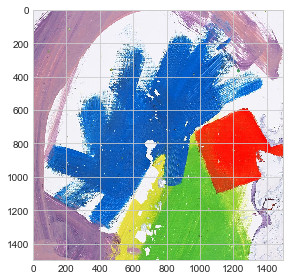

In [5]:
io.imshow('album_covers/alt-j-this-is-all-yours.jpg')

# Desafío 3: Preprocesamiento de imágenes y KMeans

In [6]:
album = io.imread('album_covers/alt-j-this-is-all-yours.jpg')
album

array([[[239, 238, 244],
        [239, 238, 244],
        [239, 238, 244],
        ...,
        [244, 243, 249],
        [244, 243, 249],
        [244, 243, 249]],

       [[239, 238, 244],
        [239, 238, 244],
        [239, 238, 244],
        ...,
        [244, 243, 249],
        [244, 243, 249],
        [244, 243, 249]],

       [[239, 238, 244],
        [239, 238, 244],
        [239, 238, 244],
        ...,
        [244, 243, 249],
        [244, 243, 249],
        [244, 243, 249]],

       ...,

       [[167, 130, 161],
        [166, 129, 160],
        [166, 129, 160],
        ...,
        [237, 235, 240],
        [239, 237, 242],
        [238, 236, 241]],

       [[166, 131, 163],
        [165, 130, 162],
        [165, 130, 162],
        ...,
        [232, 230, 235],
        [238, 236, 241],
        [240, 238, 243]],

       [[166, 131, 163],
        [165, 130, 162],
        [165, 130, 162],
        ...,
        [227, 225, 230],
        [236, 234, 239],
        [241, 239, 244]]

In [7]:
album_reshape = album.reshape((album.shape[0]*album.shape[1] , 3))
album_reshape.shape

(2250000, 3)

In [16]:
#%%time
kmeans = KMeans(n_clusters=8, random_state=3329)
fit_result = kmeans.fit_predict(album_reshape)

In [17]:
fit_result

array([0, 0, 0, ..., 0, 0, 0], dtype=int32)

In [18]:
from sklearn.cluster import MiniBatchKMeans

In [19]:
#%%time
minibatch = MiniBatchKMeans(n_clusters=8, random_state=3329)
mini_fit = minibatch.fit_predict(album_reshape)

In [20]:
mini_fit

array([1, 1, 1, ..., 1, 1, 1], dtype=int32)

fuerza a crear 8 cluster (centroides)

# Desafío 4: Extracción de valores

In [21]:
labels = kmeans.labels_

In [22]:
centers = kmeans.cluster_centers_

In [23]:
centers , centers.shape

(array([[236.38697825, 237.51600093, 243.26507544],
        [147.54033341, 114.60546004, 152.5507511 ],
        [ 17.56113385,  94.04070616, 184.14228501],
        [241.70730369,  37.00510026,  12.80199995],
        [ 97.21206687, 191.31664997,  55.54631572],
        [185.69579755, 147.77539999, 172.61572848],
        [204.68114739, 215.16155745,  75.83543127],
        [ 82.75885722, 149.00148772, 208.41631229]]), (8, 3))

In [24]:
label_unicas = np.unique(labels,return_counts=True)
label_unicas

(array([0, 1, 2, 3, 4, 5, 6, 7], dtype=int32),
 array([612570, 203100, 536433, 149405, 246482, 335937,  90325,  75748]))

In [25]:
pd.Series(labels).value_counts()

0    612570
2    536433
5    335937
4    246482
1    203100
3    149405
6     90325
7     75748
dtype: int64

# Desafío 5: Conversión rgb a hex

In [26]:
from matplotlib.colors import rgb2hex

In [31]:
colors = [rgb2hex(centers[i,:]/255) for i in range (centers.shape[0])]
colors

['#eceef3',
 '#947399',
 '#125eb8',
 '#f2250d',
 '#61bf38',
 '#ba94ad',
 '#cdd74c',
 '#5395d0']

# Desafío 6: Definición de base

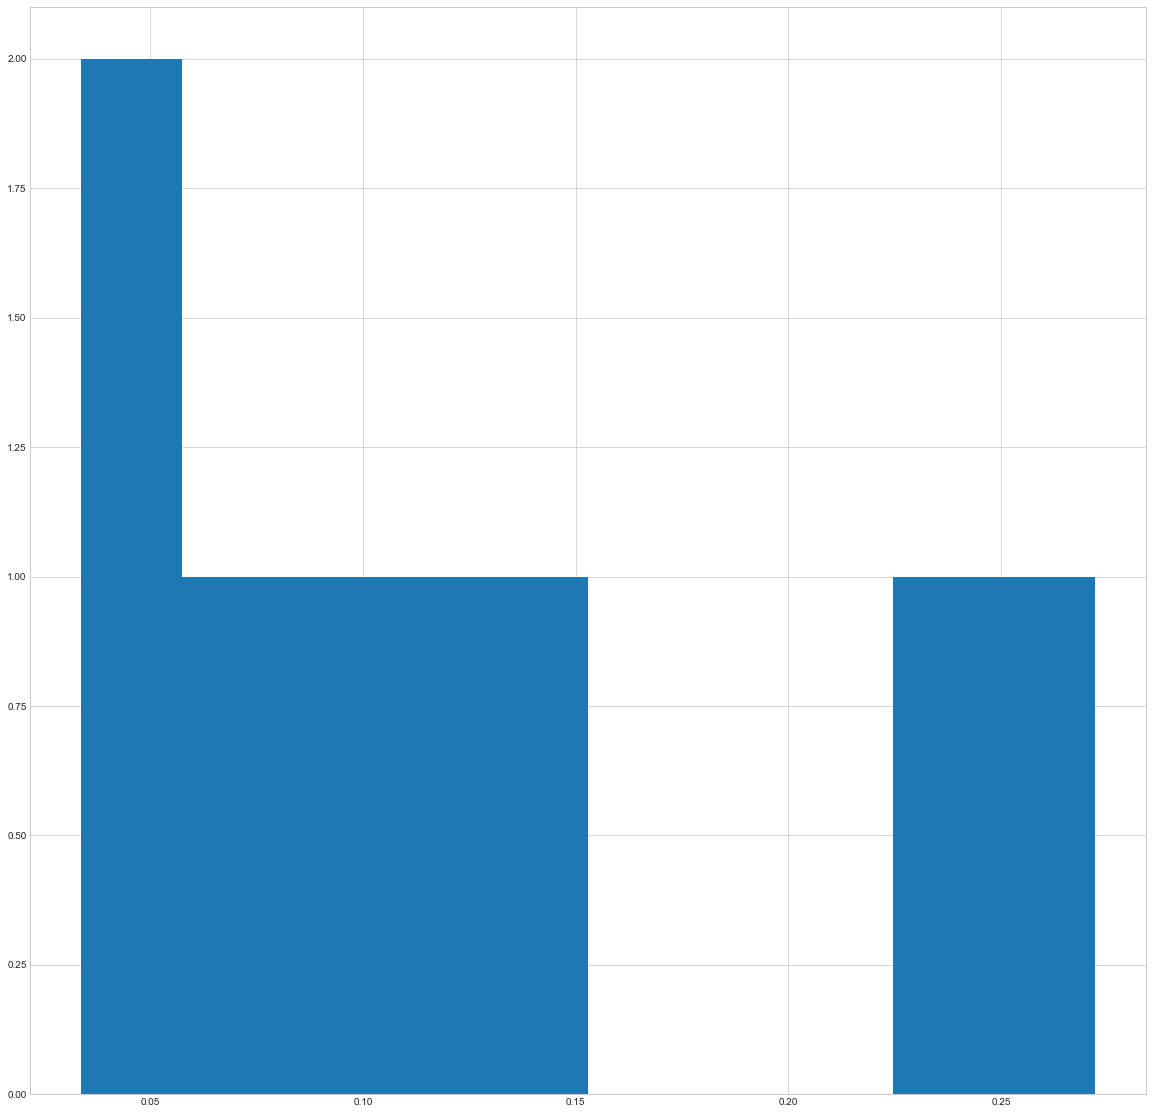

In [63]:
plt.hist(pd.Series(labels).value_counts('%'))
plt.show()

# Desafío 7: Visualización